In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp

In [2]:
df_true=pd.read_csv('True.csv')
df_fake=pd.read_csv('Fake.csv')

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
df_fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [8]:
df_true.shape

(21417, 4)

In [9]:
df_fake.shape

(23481, 4)

In [10]:
df_true.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [11]:
df_fake.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [12]:
df_true.info

<bound method DataFrame.info of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuter

In [13]:
df_fake.info

<bound method DataFrame.info of                                                    title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was rev

# Data Cleaning

In [14]:
df_true.isnull()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
21412,False,False,False,False
21413,False,False,False,False
21414,False,False,False,False
21415,False,False,False,False


In [15]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [16]:
df_fake.isnull()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
23476,False,False,False,False
23477,False,False,False,False
23478,False,False,False,False
23479,False,False,False,False


In [17]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [18]:
len(df_true)

21417

In [19]:
len(df_fake)

23481

In [20]:
df_true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [21]:
df_fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [22]:
true=df_true

In [23]:
fake=df_fake

In [24]:
fake.shape

(23481, 4)

In [25]:
fakenews = []
for i in range(23481):
  fakenews.append(1)

In [26]:
fake.insert(4, "class", fakenews, True)

In [27]:
#Concatening fake and real news together in one dataset
total = pd.concat([true,fake])
total = total.sample(frac = 1)

In [28]:
total.head()

,title,text,subject,date,class
20010,BOYCOTT! GOLDMAN SACHS Uses Union Thug Tactics...,This is how the unions do things in America. I...,left-news,"Sep 7, 2016",1.0
3100,Trump says China tried but failed to help on N...,WASHINGTON/BEIJING (Reuters) - Chinese efforts...,politicsNews,"June 20, 2017",NaN
14825,Venezuela making interest payments on foreign ...,CARACAS (Reuters) - Venezuela has started maki...,worldnews,"November 14, 2017",NaN
16186,CRYBABY NANCY PELOSI Taunts Trump On Healthcar...,https://www.youtube.com/watch?v=SH0pRtK9sAE,Government News,"Mar 24, 2017",1.0
22007,Boiler Room EP #126 – Immigration Consternation,Tune in to the Alternate Current Radio Network...,US_News,"September 15, 2017",1.0


In [29]:
total.shape

(44898, 5)

In [30]:
total.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [31]:
#We require only title and class 
data = total[['title','class']]
data.head()

,title,class
20010,BOYCOTT! GOLDMAN SACHS Uses Union Thug Tactics...,1.0
3100,Trump says China tried but failed to help on N...,NaN
14825,Venezuela making interest payments on foreign ...,NaN
16186,CRYBABY NANCY PELOSI Taunts Trump On Healthcar...,1.0
22007,Boiler Room EP #126 – Immigration Consternation,1.0


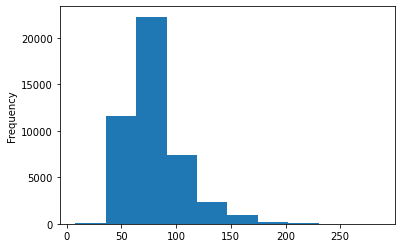

In [32]:
#plotting title on a histogram
import seaborn as sns

x = data['title'].apply(len).plot.hist()

# Preprocessing 

In [33]:
import string
#Lowercase letters
data['title'] = data['title'].str.lower()
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\3633389291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].str.lower()


,title,class
20010,boycott! goldman sachs uses union thug tactics...,1.0
3100,trump says china tried but failed to help on n...,NaN
14825,venezuela making interest payments on foreign ...,NaN
16186,crybaby nancy pelosi taunts trump on healthcar...,1.0
22007,boiler room ep #126 – immigration consternation,1.0


In [34]:
#Punctuation
punc = list(string.punctuation)
#Adding \
punc.append('\'')
#Adding ""
punc.append('"')
print(punc)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '"']


In [35]:
#Remove all punctuations
def removePunc(text):
    for i in string.punctuation:
        text = text.replace(i, '')
    return text

In [36]:
data['title'] = data['title'].apply(removePunc)
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\1517026403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(removePunc)


,title,class
20010,boycott goldman sachs uses union thug tactics ...,1.0
3100,trump says china tried but failed to help on n...,NaN
14825,venezuela making interest payments on foreign ...,NaN
16186,crybaby nancy pelosi taunts trump on healthcar...,1.0
22007,boiler room ep 126 – immigration consternation,1.0


In [37]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [38]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [39]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Tokenization

In [40]:
data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\2676297259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)


In [41]:
#Define text lemmatization model 
lemmatizer = WordNetLemmatizer()

In [42]:
def lemma(data):
  return [lemmatizer.lemmatize(w) for w in data]

In [43]:
data['title'] = data['title'].apply(lemma)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\1424781970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(lemma)


In [44]:
#Define all stopwords in the English language (it, was, for, etc.)
stop = stopwords.words('english')

In [45]:
#Remove stopwords 
data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])

C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\128912987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])


In [46]:
data.head(5)

,title,class
20010,"[boycott, goldman, sachs, us, union, thug, tac...",1.0
3100,"[trump, say, china, tried, failed, help, north...",NaN
14825,"[venezuela, making, interest, payment, foreign...",NaN
16186,"[crybaby, nancy, pelosi, taunt, trump, healthc...",1.0
22007,"[boiler, room, ep, 126, –, immigration, conste...",1.0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
labels = data['class']
labels.head()

20010    1.0
3100     NaN
14825    NaN
16186    1.0
22007    1.0
Name: class, dtype: float64

In [49]:
#Split data into training and testing dataset
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1000)
title_train, title_test, y_train, y_test = train_test_split(data['title'],labels, test_size=0.2,random_state=1000)
#X_train, X_test, y_train, y_test = train_test_split(data['total'], data.label, test_size=0.20, random_state=0)

Vectorization

In [51]:
#Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

NameError: name 'X_train' is not defined

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

NameError: name 'X_train' is not defined

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer.fit(X_train)
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

NameError: name 'vectorizer' is not defined

In [54]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

In [55]:
reg = LogisticRegression()

In [56]:
reg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [57]:
#Logistic Regression 
reg = LogisticRegression(C=1e5)
reg.fit(count_train, y_train)

NameError: name 'count_train' is not defined

In [58]:
pred_reg_count = reg.predict(count_test)
acc_reg_count = metrics.accuracy_score(y_test,pred_logreg_count)

NameError: name 'count_test' is not defined

In [59]:
print(acc_reg_count)

NameError: name 'acc_reg_count' is not defined

In [60]:
import sklearn.metrics as metrics
cm3 = metrics.confusion_matrix(y_test, pred_reg_count, labels=[0,1])
plot_confusion_matrix(cm3, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Count Vectorizer')

NameError: name 'pred_reg_count' is not defined

In [61]:
labels=data['class']
labels.head()

20010    1.0
3100     NaN
14825    NaN
16186    1.0
22007    1.0
Name: class, dtype: float64

In [62]:
import tensorflow_hub as hub
import tensorflow as tf

In [63]:
embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [64]:
#Convert each series of words to a word to vector embedding
indiv = []
for i in title_train:
  temp = np.array(embed(i))
 
  indiv.append(temp)

In [65]:
#Accounts for different length of words
indiv = tf.keras.preprocessing.sequence.pad_sequences(indiv,dtype='float')
indiv.shape

(35918, 34, 250)

In [66]:
#Convert each of the testing data series to a word to vector embedding
test = []

In [67]:
for i in title_test:
  temp = np.array(embed(i))
  test.append(temp)

In [68]:
#Accounts for the different length of words in test data
test = tf.keras.preprocessing.sequence.pad_sequences(test,dtype='float')

In [69]:
#sequential model
model = tf.keras.models.Sequential()

In [70]:
model.add(tf.keras.layers.LSTM(50))
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [71]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),\
              loss="binary_crossentropy", metrics=['accuracy'])

In [72]:
model.fit(indiv, y_train,validation_data=[test,y_test],epochs=10)

Epoch 1/10
1123/1123 [==============================] - 32s 21ms/step - loss: nan - accuracy: 2.7841e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
1123/1123 [==============================] - 20s 18ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
1123/1123 [==============================] - 20s 18ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
1123/1123 [==============================] - 20s 18ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
1123/1123 [==============================] - 20s 18ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
1123/1123 [==============================] - 20s 18ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
1123/1123 [==============================] - 21s 18ms/step - loss: nan - accuracy: 0.0000e+00 - val_l

In [73]:
#TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(title_train) 
tfidf_test=tfidf_vectorizer.transform(title_test)

AttributeError: 'list' object has no attribute 'lower'

In [74]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

NameError: name 'tfidf_train' is not defined

In [75]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

NameError: name 'tfidf_test' is not defined

In [76]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

NameError: name 'y_pred' is not defined

In [77]:
!pip install tensorflow-text
import tensorflow_hub as hub
import tensorflow_text as text

#bert preprocesser and bert encoder from tensorflow_hub
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [78]:
import tensorflow as tf

In [79]:
input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='news')

In [80]:
# BERT layers
processed = bert_preprocess(input_layer)
output = bert_encoder(processed)

In [81]:

layer = tf.keras.layers.Dropout(0.2, name='dropout')(output['pooled_output'])
layer = tf.keras.layers.Dense(10,activation='relu', name='hidden')(layer)
layer = tf.keras.layers.Dense(1,activation='sigmoid', name='output')(layer)

model = tf.keras.Model(inputs=[input_layer],outputs=[layer])


In [82]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(title_train,y_train,epochs=5)
model.evaluate(title_test,y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).